### Apply ML algorithms

- Linear Regression
- Lasso Regression
- Decision Tree Regressor
- RandomForestRegressor
- Xgboost Regressor
- Hyperparameter Tuning

### For Now We will apply Linear and Lasso Regression 

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df=pd.read_csv('Data/Final_Data/final_combine.csv')

In [51]:
df.head()

,T,TM,Tm,H,VV,V,VM,PM 2.5
0,8.9,15.0,5.0,93.0,0.5,4.8,11.1,284.795833
1,6.6,10.0,3.0,99.0,0.6,8.1,13.0,182.187500
2,7.8,14.0,3.0,79.0,1.6,11.7,18.3,223.208333
3,13.4,29.0,7.0,55.0,2.4,11.9,22.2,200.645833
4,15.2,21.0,10.0,88.0,0.6,8.9,18.3,285.225000


<AxesSubplot: >

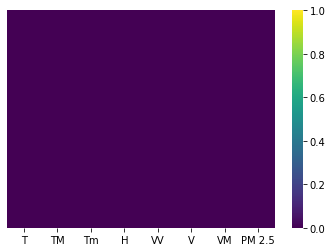

In [52]:
## Check for null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [53]:
# dropping null
df=df.dropna()

In [54]:
X=df.iloc[:,:-1] ## independent features [ full , start:last]
y=df.iloc[:,-1] ## dependent features [ full, only last]

In [55]:
## check null values
X.isnull()

,T,TM,Tm,H,VV,V,VM
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1102,False,False,False,False,False,False,False
1103,False,False,False,False,False,False,False
1104,False,False,False,False,False,False,False
1105,False,False,False,False,False,False,False


In [56]:
y.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1102    False
1103    False
1104    False
1105    False
1106    False
Name: PM 2.5, Length: 1105, dtype: bool

#### pair plot to see plot so we can see basic trends between all the Parameters.

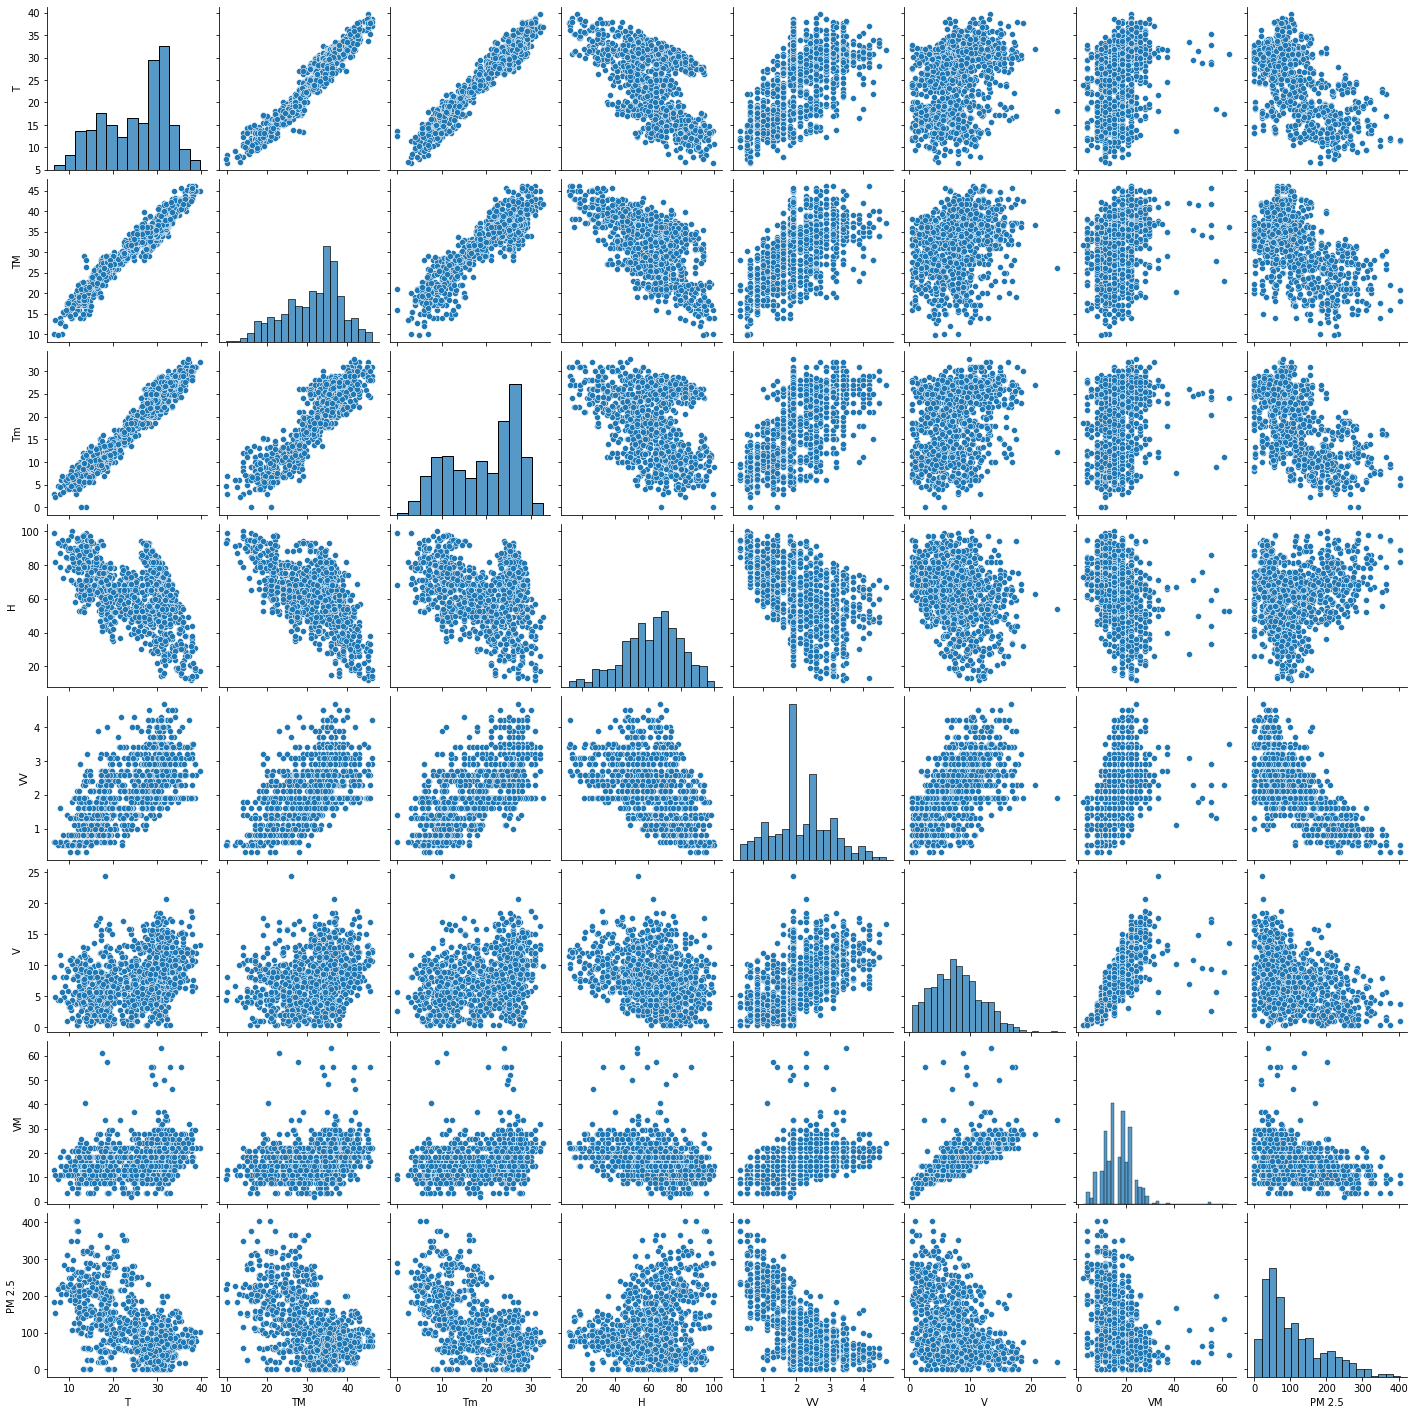

In [57]:
sns.pairplot(df)

In [58]:
df.corr()

,T,TM,Tm,H,VV,V,VM,PM 2.5
T,1.000000,0.965960,0.963751,-0.508524,0.577169,0.326493,0.275799,-0.618661
TM,0.965960,1.000000,0.890627,-0.597787,0.532991,0.279156,0.270378,-0.555090
Tm,0.963751,0.890627,1.000000,-0.326634,0.551675,0.335655,0.252150,-0.655253
H,-0.508524,-0.597787,-0.326634,1.000000,-0.466681,-0.305809,-0.327529,0.156061
VV,0.577169,0.532991,0.551675,-0.466681,1.000000,0.536275,0.411468,-0.651973
V,0.326493,0.279156,0.335655,-0.305809,0.536275,1.000000,0.729656,-0.447076
VM,0.275799,0.270378,0.252150,-0.327529,0.411468,0.729656,1.000000,-0.353728
PM 2.5,-0.618661,-0.555090,-0.655253,0.156061,-0.651973,-0.447076,-0.353728,1.000000


### Correlation Matrix with Heatmap
#### Similar to corr but just ploted it using sns
Correlation states how the features are related to each other or the target variable.
Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)
Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

Index(['T', 'TM', 'Tm', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')


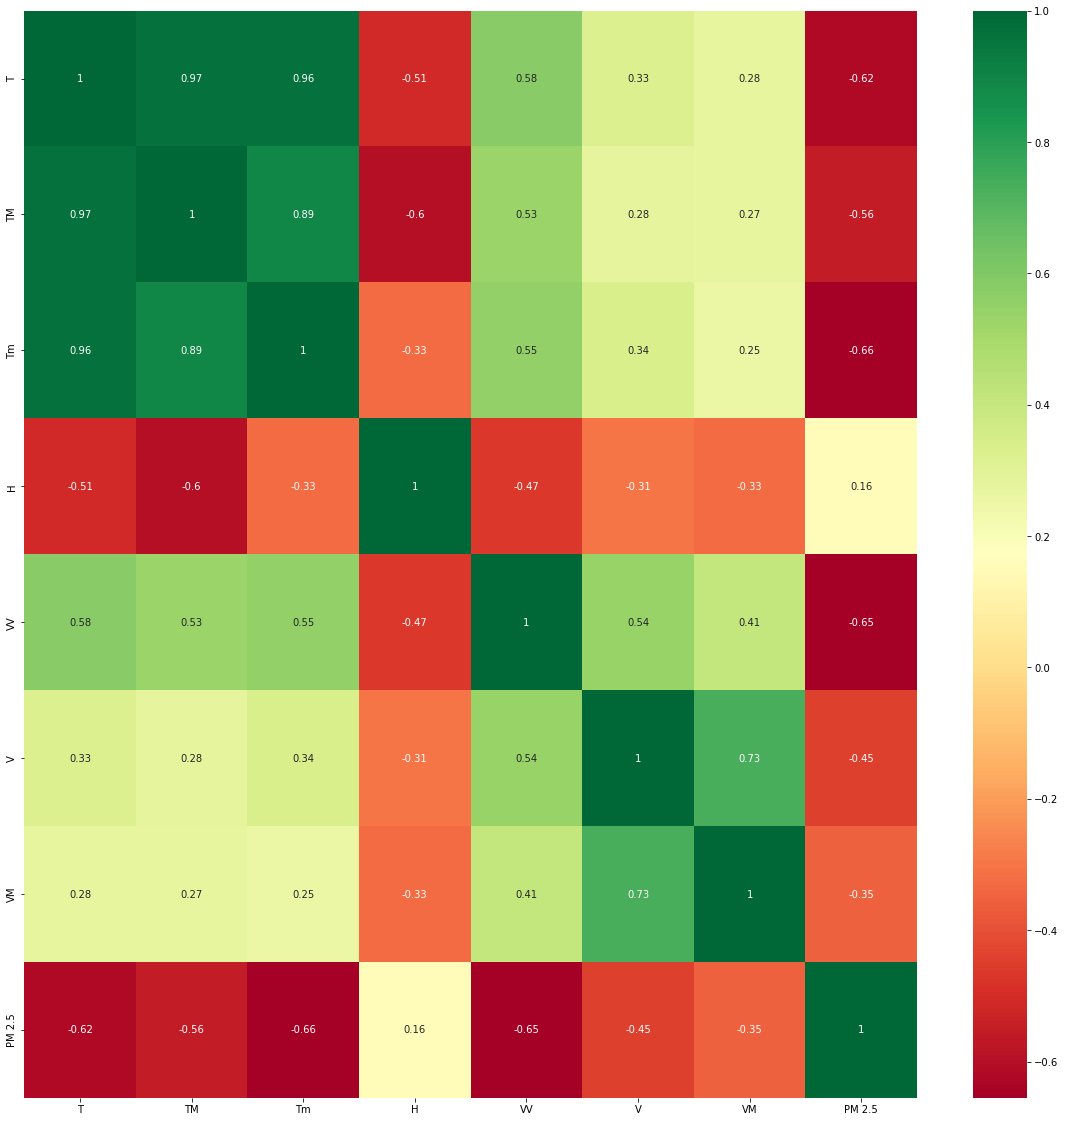

In [59]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
print(top_corr_features)
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [60]:
corrmat.index

Index(['T', 'TM', 'Tm', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [61]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [62]:
X.head()

,T,TM,Tm,H,VV,V,VM
0,8.9,15.0,5.0,93.0,0.5,4.8,11.1
1,6.6,10.0,3.0,99.0,0.6,8.1,13.0
2,7.8,14.0,3.0,79.0,1.6,11.7,18.3
3,13.4,29.0,7.0,55.0,2.4,11.9,22.2
4,15.2,21.0,10.0,88.0,0.6,8.9,18.3


In [63]:
print(model.feature_importances_)

[0.1598724  0.08571542 0.21285483 0.087344   0.35097863 0.06367827
 0.03955646]


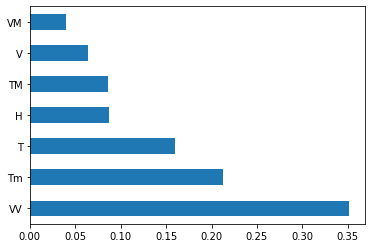

In [64]:
#ploting graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

C:\Users\805ka\AppData\Local\Temp\ipykernel_13484\476133659.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<AxesSubplot: xlabel='PM 2.5', ylabel='Density'>

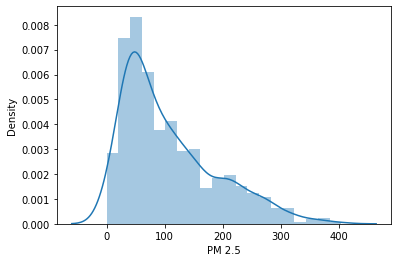

In [65]:
sns.distplot(y)

### Train Test split

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [69]:
regressor.coef_

array([ -1.44616275,  -3.12673464,  -1.12031722,  -1.76194721,
       -43.74392541,  -2.65903283,  -0.5136059 ])

In [70]:
regressor.intercept_

497.16902524308193

#### Linear Regression Scores : R^2, Cross Value Score

In [71]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.6230696218572034
Coefficient of determination R^2 <-- on test set: 0.5912612508943714


In [72]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [73]:
score.mean()

0.5577470212986775

#### Model Evaluation

In [74]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T,-1.446163
TM,-3.126735
Tm,-1.120317
H,-1.761947
VV,-43.743925
V,-2.659033
VM,-0.513606


Interpreting the coefficients:
- Holding all other features fixed, a 1 unit increase in Independent Featue is associated with an increase / decrease of VALUE in AQI PM2.5.
- Holding all other features fixed, a 1 unit increase in T is associated with an decrease of 2.690 in AQI PM2.5.
- Holding all other features fixed, a 1 unit increase in TM is associated with an increase of 0.46 in AQI PM 2.5.


In [75]:
prediction=regressor.predict(X_test)

C:\Users\805ka\AppData\Local\Temp\ipykernel_13484\1520944062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<AxesSubplot: xlabel='PM 2.5', ylabel='Density'>

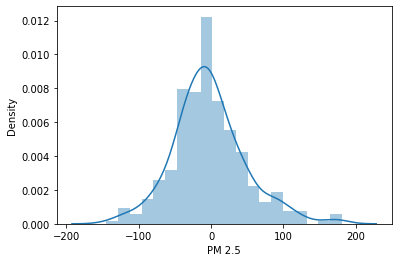

In [76]:
sns.distplot(y_test-prediction)

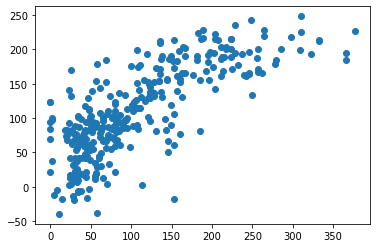

In [77]:
plt.scatter(y_test,prediction)

### Regression Evaluation Metrics ( Linear Regression )


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [78]:
from sklearn import metrics

#### Errors in Linear Regression : RMSE, MSE, MAE

In [79]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 37.865184660089916
MSE: 2554.019804262807
RMSE: 50.53731101139837


### Saving Linear Regression Model

In [80]:
import pickle 

In [81]:
# open a file, where you ant to store the data
file = open('liner_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)

#### We are done with Linear Regression and also created Model for same.

### Comparison Linear, Ridge and Lasso Regression

In [82]:
lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-2769.947753578711


### Ridge Regression and Score

In [83]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [84]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [85]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-2739.532326359712


### Lasso Regression

In [86]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [87]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)

c:\Users\805ka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.086e+06, tolerance: 5.504e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\805ka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.111e+06, tolerance: 6.272e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\805ka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [88]:
print("Best Parameter Lasso Regression : ", lasso_regressor.best_params_)
print("Best Score Lasso Regression : ",lasso_regressor.best_score_)

Best Parameter Lasso Regression :  {'alpha': 1}
Best Score Lasso Regression :  -2752.7332301600677


#### Model Evaluation

In [89]:
prediction=lasso_regressor.predict(X_test)

C:\Users\805ka\AppData\Local\Temp\ipykernel_13484\1520944062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<AxesSubplot: xlabel='PM 2.5', ylabel='Density'>

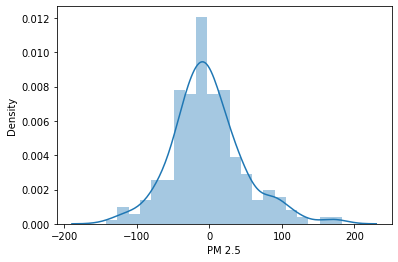

In [90]:
sns.distplot(y_test-prediction)

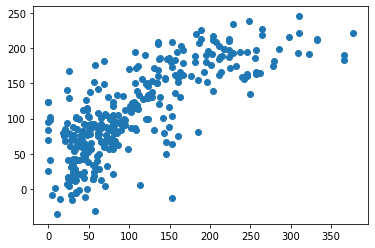

In [91]:
plt.scatter(y_test,prediction)

#### Errors in Lasso Regression Model

In [92]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 37.490108547797696
MSE: 2526.3920131391337
RMSE: 50.26322724556327


#### Saving Model

In [93]:
# open a file, where you ant to store the data
file = open('lasso_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(lasso_regressor, file)